# Imports

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns


In [2]:
stats = pd.read_csv('stats.csv')
stats

,name,platform,id,team_name,car_name,avg_speed,total_distance,shots,shots_against,goals,goals_against,saves,assists,score,mvp,shooting_percentage,demos_inflicted,demos_taken
0,MrWeza7,epic,1bc6c6733f0d423785729728aa04f8b4,MANGA,Fennec,1394,463087,2,5,1,4,0,0,218,False,50.0,0,0
1,ak559ram,ps4,ak559ram,MANGA,Octane,1557,517195,1,5,0,4,0,0,190,False,0.0,0,1
2,TR BeShOy,epic,fc1a9af1c0b9488fb678a07b79392cad,MANGA,Octane,1562,519549,3,5,0,4,0,1,178,False,0.0,4,1
3,3R7,steam,76561198808310871,BABABOOEY,Octane,1438,480490,2,6,2,1,2,1,479,True,100.0,0,1
4,Omar,steam,76561198274220626,BABABOOEY,Octane,1667,551014,2,6,1,1,1,1,364,False,50.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,LakzInASlump,epic,51104b5ef1f542f0bbab05a11cd6e161,NIGGERS,Octane,1471,468464,5,5,0,1,2,0,302,False,0.0,0,0
146,Haithomianzz,ps4,Haithomianzz,NIGGERS,Octane,1425,453376,1,5,0,1,0,1,212,False,0.0,1,0
147,rfkill,epic,cd708536d4ea47c8b63bbf211de9b300,WHITES,Octane,1374,432680,2,9,1,2,1,0,317,False,50.0,0,1
148,aymaanfawzy,epic,759153e81c9a4f969af5ae0be5fd7e9c,WHITES,Fennec,1222,386003,2,9,0,2,2,0,238,False,0.0,0,0


In [3]:
def fix(x):
    if x['team_name'] == 'TRIPLE THREAT':
        if x['id'] in ['76561198345081954', '76561198284555813', 'IAMOn_Fir3']:
            x['team_name'] = 'TRIPLE THREAT div 2'

        else:
            x['team_name'] = 'TRIPLE THREAT div 1'

    return x

In [4]:
stats = stats.apply(lambda x: fix(x), axis=1)

In [5]:
stats.team_name.unique()


array(['MANGA', 'BABABOOEY', 'GROG', 'NIGHT EAGLES', 'MANSOURA', 'BBL',
       'REAL MADRID FC', 'TRIPLE THREAT div 1', 'DEADLY',
       'SNOOP WELSO7BA', 'GOLD BOOMERS', 'TRIPLE THREAT div 2', 'NIGGERS',
       'WHITES'], dtype=object)

# Cars Usage

In [6]:
cars = stats.groupby(by='car_name')['name'].count().sort_values(ascending=False)
cars = cars/len(stats)
cars

car_name
Octane                         0.733333
Fennec                         0.200000
'99 Nissan Skyline GT-R R34    0.046667
Dominus                        0.013333
Esper                          0.006667
Name: name, dtype: float64

In [7]:
other = 0 
for i in cars[cars < 0.04]:
    other += i

cars = cars[cars > 0.04]
cars['Other'] = other
cars

car_name
Octane                         0.733333
Fennec                         0.200000
'99 Nissan Skyline GT-R R34    0.046667
Other                          0.020000
Name: name, dtype: float64

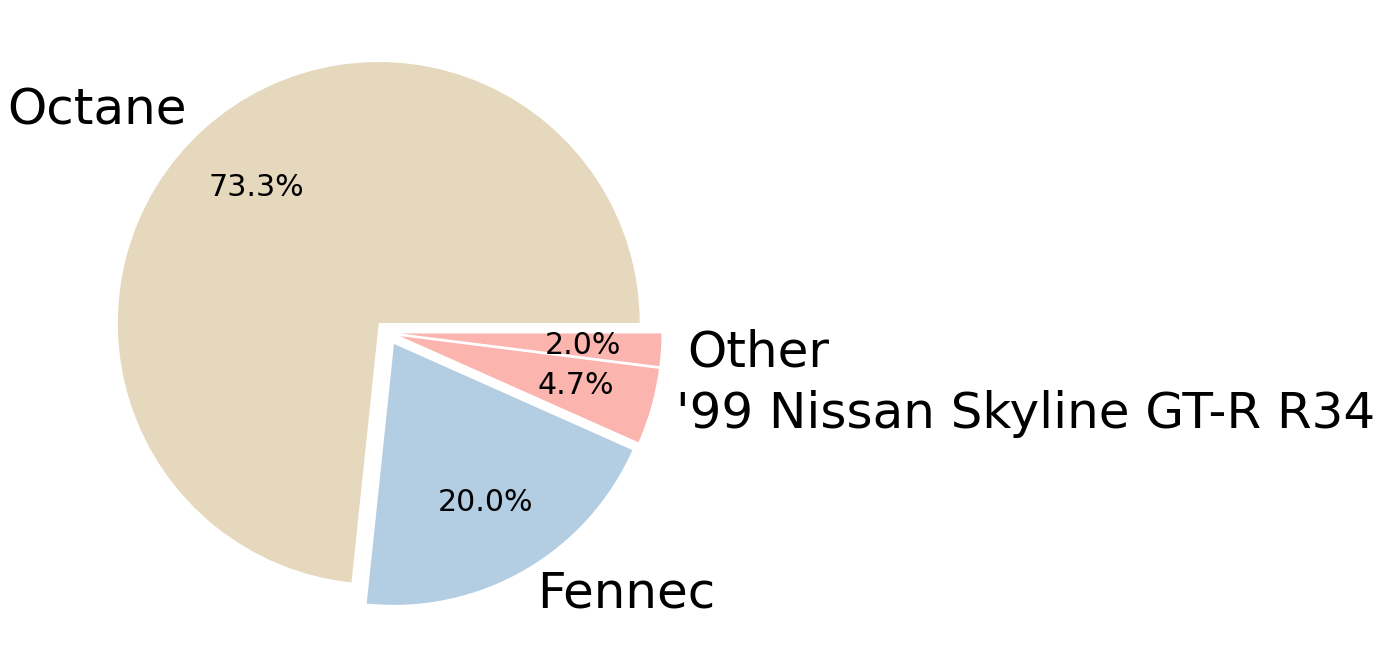

In [8]:
#Using matplotlib
pie, ax = plt.subplots(figsize=[20,12])
labels = cars.keys()
cs = cm.Pastel1(cars.values)
patches, texts, autotexts = ax.pie(
    x=cars, autopct="%.1f%%", explode=[0.05]*len(cars), 
    labels=labels, pctdistance=0.7, textprops={'color':"k"},
    colors=cs)

for i in range(len(texts)):
    texts[i].set_fontsize(50)
    autotexts[i].set_fontsize(30)

pie.savefig("cars.png")

# other stats

In [9]:
stats
stats[stats['name']=='Karim Benzema']

,name,platform,id,team_name,car_name,avg_speed,total_distance,shots,shots_against,goals,goals_against,saves,assists,score,mvp,shooting_percentage,demos_inflicted,demos_taken
61,Karim Benzema,steam,76561198104641546,REAL MADRID FC,Fennec,1506,494026,3,9,2,2,1,1,534,False,66.666664,0,1
68,Karim Benzema,steam,76561198104641546,REAL MADRID FC,Fennec,1448,641739,2,14,2,3,1,0,417,0,100.000000,0,4
73,Karim Benzema,steam,76561198104641546,REAL MADRID FC,Fennec,1428,474047,2,7,2,2,0,1,499,True,100.000000,2,0


In [10]:
stats[['name', 'assists']].groupby('name').describe().sort_values(ascending=False, by=('assists', 'mean'))

shooting_percentage                                   \
                               count       mean        std        min   
name                                                                    
Karim Benzema                    3.0  88.888888  19.245011  66.666664   
6J6O6K6E6R6                      4.0  58.333333  28.867514  33.333332   
Evo.                             4.0  49.999998  33.333332   0.000000   
LIGHT                            4.0  44.642857  42.207376   0.000000   
Snsb                             4.0  43.750000  12.500000  25.000000   
N O T E.                         4.0  43.750000  42.695628   0.000000   
Olwan365                         4.0  43.333332  15.869840  33.333332   
u are noob                       3.0  42.857143  15.907898  28.571428   
Omar                             3.0  41.666667  14.433757  25.000000   
3R7                              3.0  41.666667  52.041650   0.000000   
Dumb                             3.0  38.888888  34.694432   0.000000   
Gareth Bale                      3.0  33.333333  57.735027   0.000000   
I3bdoGX                          3.0  33.333333  57.735027   0.000000   
Syco-Smsm                        3.0  33.333333  57.735027   0.000000   
ABDOx5OD                         3.0  33.333333  57.735027   0.000000   
Chevoux                          4.0  33.333333  47.140452   0.000000   
Saitama.                         4.0  33.333333  47.140452   0.000000   
rfkill                           4.0  29.166666  34.359213   0.000000   
Vertzoz                          4.0  29.166666  34.359213   0.000000   
SpeedTouch                       3.0  26.666667  23.094011   0.000000   
AJ                               3.0  25.000000  25.000000   0.000000   
MrWeza7                          3.0  25.000000  25.000000   0.000000   
Blaster.isbanned                 4.0  24.305555  20.459611   0.000000   
Natio2001                        3.0  22.222221  38.490016   0.000000   
V                                4.0  20.833333  25.000000   0.000000   
Amar                             4.0  20.833333  25.000000   0.000000   
NotCrabz                         4.0  20.833333  25.000000   0.000000   
ToxicPrison                      4.0  18.750000  37.500000   0.000000   
LakzInASlump                     4.0  18.750000  23.935678   0.000000   
S7vB                             3.0  16.666667  28.867513   0.000000   
Jasminea_                        4.0  16.666666  33.333332   0.000000   
Haithomianzz                     4.0  14.583333  17.179606   0.000000   
ak559ram                         3.0  11.111111  19.245008   0.000000   
ancient rl                       3.0  11.111111  19.245008   0.000000   
Freezee4ever                     3.0  11.111111  19.245008   0.000000   
Bsharp                           4.0   8.333333  16.666666   0.000000   
aymaanfawzy                      4.0   8.333333  16.666666   0.000000   
Bardrick916                      4.0   0.000000   0.000000   0.000000   
IAMOn_Fir3                       4.0   0.000000   0.000000   0.000000   
TR BeShOy                        3.0   0.000000   0.000000   0.000000   
Hazem                            3.0   0.000000   0.000000   0.000000   
XtratoS                          1.0   0.000000        NaN   0.000000   
Get Schwifty97                   4.0   0.000000   0.000000   0.000000   

                                                                 
                        25%         50%         75%         max  
name                                                             
Karim Benzema     83.333332  100.000000  100.000000  100.000000  
6J6O6K6E6R6       45.833333   50.000000   62.500000  100.000000  
Evo.              49.999998   66.666664   66.666664   66.666664  
LIGHT             21.428571   39.285714   62.500000  100.000000  
Snsb              43.750000   50.000000   50.000000   50.000000  
N O T E.          18.750000   37.500000   62.500000  100.000000  
Olwan365          33.333332   36.666666   46.666666   66.666664 

# Demos/Goals

In [11]:
demos = stats[['name', 'goals']].groupby(
    'name').describe()[
        [('goals', 'mean'), ('goals', 'count')]].sort_values(
            ascending=False, by=('goals', 'mean'))

In [12]:
demos[('goals', 'total')] = (demos[('goals', 'mean')] * demos[('goals', 'count')]).astype(int)
demos = demos.iloc[:6]
demos[('goals', 'mean')] = demos[('goals', 'mean')].round(2)
demos

goals            
               mean count total
name                           
u are noob     2.33   3.0     7
Karim Benzema  2.00   3.0     6
Snsb           2.00   4.0     8
Saitama.       2.00   4.0     8
Olwan365       1.50   4.0     6
Evo.           1.50   4.0     6

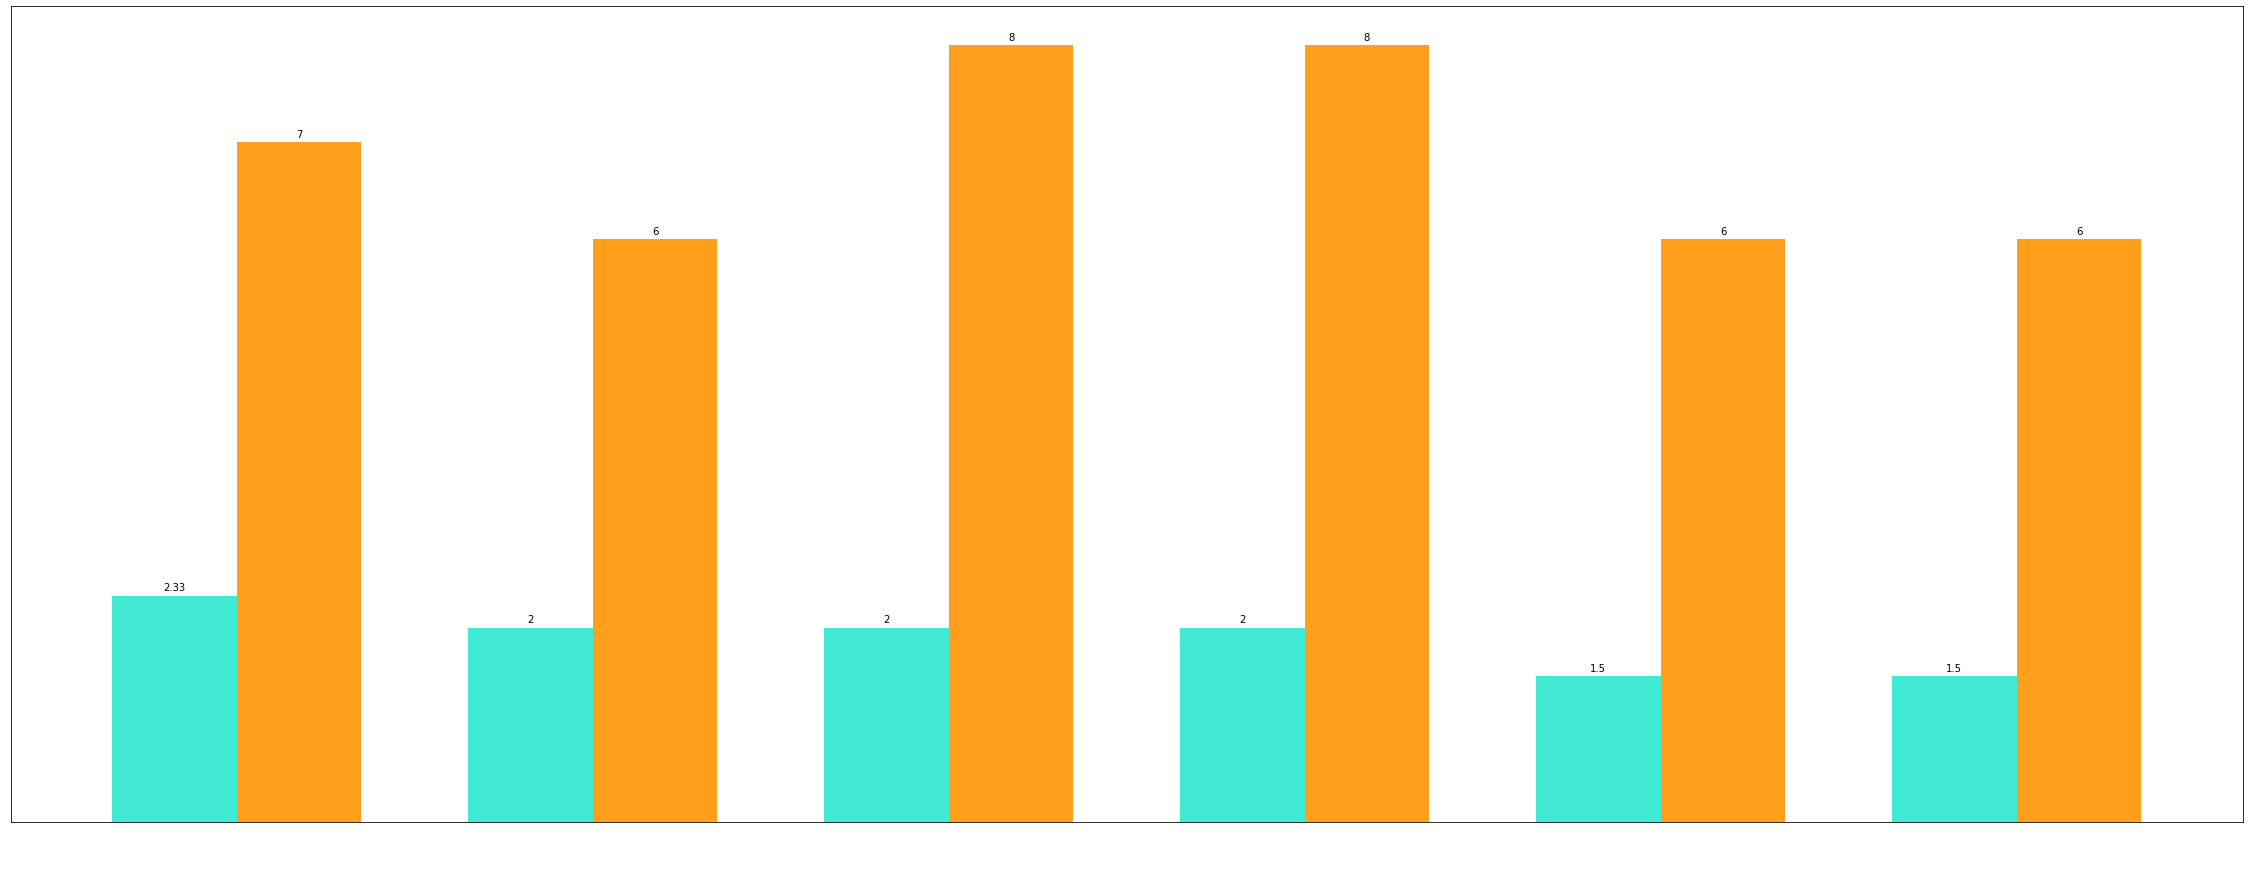

In [26]:
x = np.arange(len(demos))  # the label locations
width = 0.35  # the width of the bars
labels = demos.index

cs1 = cm.Pastel1(demos[('goals', 'mean')].values)
cs2 = cm.Pastel1_r(demos[('goals', 'total')].values)


fig, ax = plt.subplots(figsize=[40,15])
rects1 = ax.bar(x - width/2, demos[('goals', 'mean')], width, label='Average Demos Per Game', color='#41EAD4')
rects2 = ax.bar(x + width/2, demos[('goals', 'total')], width, label='Total Demos Overall', color='#FF9F1C')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(axis='x', colors='w')

plt.yticks([])
plt.xticks(fontsize=50)
#ax.legend(fontsize=25)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.savefig("goals.png")

plt.show()